In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Loading the DataFrames

### Reading the file and converting to a DataFrame

In [3]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

# # Transforming the Training DataFrame

### Checking the Number of Columns with NULL values

<AxesSubplot:>

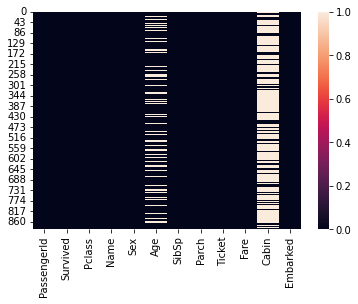

In [4]:
sns.heatmap(df_train.isna())

### Removing the NULL values from 'Age' column

In [5]:
print('The percentage of NULLs in Training DataFrame Age column is: {:.2f} %'.format((df_train['Age'].isna().sum()/len(df_train['Age']))*100))

The percentage of NULLs in Training DataFrame Age column is: 19.87 %


In [6]:
train_age_corr = df_train.corr()['Age'].sort_values()
train_age_corr.drop('Age', inplace=True)
df_train_corr = pd.DataFrame(train_age_corr.values, columns=['Correlation'], index=train_age_corr.keys())
df_train_corr.sort_values('Correlation')

,Correlation
Pclass,-0.369226
SibSp,-0.308247
Parch,-0.189119
Survived,-0.077221
PassengerId,0.036847
Fare,0.096067


In [7]:
df_train.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [8]:
df_train['Age'] = df_train.groupby('Pclass')['Age'].transform(lambda row : row.fillna(row.median()))

<AxesSubplot:>

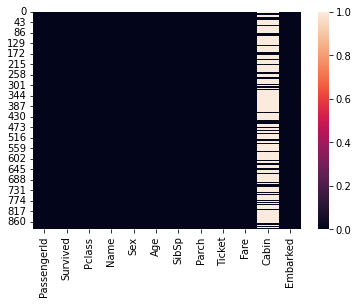

In [9]:
sns.heatmap(df_train.isna())

### Removing the NULL values from 'Cabin' column

In [10]:
print('The percentage of NULLs in Training DataFrame Cabin column is: {:.2f} %'.format((df_train['Cabin'].isna().sum()/len(df_train['Cabin']))*100))

The percentage of NULLs in Training DataFrame Cabin column is: 77.10 %


In [11]:
df_train.drop('Cabin',axis=1,inplace=True)

In [12]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

### Removing the NULL values from 'Embarked' column

In [13]:
print('The percentage of NULLs in Training DataFrame Embarked column is: {:.2f} %'.format((df_train['Embarked'].isna().sum()/len(df_train['Embarked']))*100))

The percentage of NULLs in Training DataFrame Embarked column is: 0.22 %


In [14]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
df_train.fillna('S',axis=1,inplace=True)

In [16]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Converting non-numerical columns to numerical

In [17]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [18]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### Converting non-numerical column to numerical

In [19]:
gender = pd.get_dummies(df_train['Sex'],drop_first=True)

In [20]:
df_train['Gender'] = gender

In [21]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


### Searching for Correlations

The value of correlation coefficient can vary between -1 and 1 and the obtained result defines whether the correlation is negative or positive.

To interpret the correlation, it is necessary to know that 1 means that the correlation between the variables is perfect positive and -1 means that it is perfect negative. If the correlation coefficient is equal to 0 it means that the variables don't depend on each other.

Plus or minus 0.9 indicates a very strong correlation // 0.7 to 0.9 positive or negative indicates a strong correlation // 0.5 to 0.7 positive or negative indicates a moderate correlation // 0.3 to 0.5 positive or negative indicates a weak correlation // 0 to 0.3 positive or negative indicates a negligible correlation.

In [22]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
PassengerId,1.000000,-0.005007,-0.035144,0.035840,-0.057527,-0.001652,0.012658,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.047255,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.408487,0.083081,0.018443,-0.549500,0.131900
Age,0.035840,-0.047255,-0.408487,1.000000,-0.243526,-0.171095,0.123784,0.078421
SibSp,-0.057527,-0.035322,0.083081,-0.243526,1.000000,0.414838,0.159651,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.171095,0.414838,1.000000,0.216225,-0.245489
Fare,0.012658,0.257307,-0.549500,0.123784,0.159651,0.216225,1.000000,-0.182333
Gender,0.042939,-0.543351,0.131900,0.078421,-0.114631,-0.245489,-0.182333,1.000000


In [23]:
df_train.corr()['Survived'].sort_values()

Gender        -0.543351
Pclass        -0.338481
Age           -0.047255
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='count'>

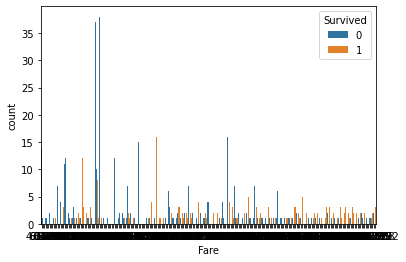

In [24]:
sns.countplot(data=df_train, x='Fare',hue='Survived')

### Dropping the Unnecessary Columns

In [25]:
df_train.drop(['Name', 'Sex', 'Ticket', 'Embarked', 'PassengerId', 'Fare'],axis=1,inplace=True)

df_train

,Survived,Pclass,Age,SibSp,Parch,Gender
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1
...,...,...,...,...,...,...
886,0,2,27.0,0,0,1
887,1,1,19.0,0,0,0
888,0,3,24.0,1,2,0
889,1,1,26.0,0,0,1


# Transforming the Testing DataFrame

In [26]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Checking the Number of Columns with NULL values

In [27]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

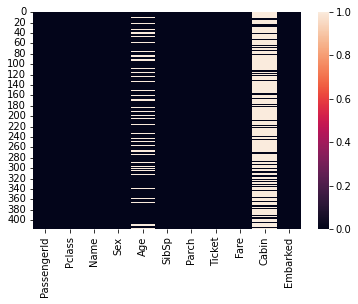

In [28]:
sns.heatmap(df_test.isna())

### Removing the NULL values from 'Age' column

In [29]:
print('NULLs percentage in Testing DataFrame Age column is: {:.2f} %'.format((df_test['Age'].isna().sum()/len(df_test['Age']))*100))

NULLs percentage in Testing DataFrame Age column is: 20.57 %


In [30]:
age_corr = df_test.corr()['Age'].sort_values()
age_corr.drop('Age', inplace=True)
df_corr = pd.DataFrame(age_corr.values, columns=['Correlation'], index= age_corr.keys())
df_corr.sort_values('Correlation')

,Correlation
Pclass,-0.492143
SibSp,-0.091587
Parch,-0.061249
PassengerId,-0.034102
Fare,0.337932


In [31]:
df_test.groupby('Pclass')['Age'].median()

Pclass
1    42.0
2    26.5
3    24.0
Name: Age, dtype: float64

In [32]:
df_test['Age'] = df_test.groupby('Pclass')['Age'].transform(lambda row: row.fillna(row.median()))

In [33]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,NaN,S


In [34]:
df_test.isna()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,False,False,False,False,True,False


### Removing the NULL values from 'Cabin' column

In [35]:
print('NULLs percentage in Testing DataFrame Cabin column is: {:.2f} %'.format((df_test['Cabin'].isna().sum()/len(df_test['Cabin']))*100))

NULLs percentage in Testing DataFrame Cabin column is: 78.23 %


In [36]:
df_test.drop('Cabin',axis=1,inplace=True)

In [37]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

### Removing the NULL values from 'Fare' column

In [38]:
print('NULLs percentage in Testing DataFrame Fare column is: {:.2f} %'.format((df_test['Fare'].isna().sum()/len(df_test['Fare']))*100))

NULLs percentage in Testing DataFrame Fare column is: 0.24 %


In [39]:
df_test['Fare'].median()

14.4542

In [40]:
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

In [41]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Converting non-numerical column to numerical

In [42]:
gender = pd.get_dummies(df_test['Sex'],drop_first=True)
df_test['Gender'] = gender

In [43]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,1
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S,1


### Dropping the Unnecessary Columns

In [44]:
df_test_to_result = df_test['PassengerId']
df_test.drop(['Name', 'Sex', 'Ticket', 'Embarked', 'PassengerId', 'Fare'],axis=1,inplace=True)

# Validating the DataFrames

In [45]:
df_train

,Survived,Pclass,Age,SibSp,Parch,Gender
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1
...,...,...,...,...,...,...
886,0,2,27.0,0,0,1
887,1,1,19.0,0,0,0
888,0,3,24.0,1,2,0
889,1,1,26.0,0,0,1


In [46]:
df_test

,Pclass,Age,SibSp,Parch,Gender
0,3,34.5,0,0,1
1,3,47.0,1,0,0
2,2,62.0,0,0,1
3,3,27.0,0,0,1
4,3,22.0,1,1,0
...,...,...,...,...,...
413,3,24.0,0,0,1
414,1,39.0,0,0,0
415,3,38.5,0,0,1
416,3,24.0,0,0,1


# Separating the Variables

In [47]:
# Training DataFrame Dependent Variables
# x_train = df_train[[SibSp', 'Gender', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'adult', 'children', 'senior', 'teenager', 'young_adult', '1stClass', '2ndClass', '3rdClass']]
x_train=df_train.iloc[:,2:]

# Training DataFrame Independent Variables
# y_train = df_train['Survived']
y_train=df_train.Survived


# Testing DataFrame Dependent Variables
# x_test = df_test[[SibSp', 'Gender', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'adult', 'children', 'senior', 'teenager', 'young_adult', '1stClass', '2ndClass', '3rdClass']]
x_test=df_test.iloc[:,1:]

In [48]:
x_train

,Age,SibSp,Parch,Gender
0,22.0,1,0,1
1,38.0,1,0,0
2,26.0,0,0,0
3,35.0,1,0,0
4,35.0,0,0,1
...,...,...,...,...
886,27.0,0,0,1
887,19.0,0,0,0
888,24.0,1,2,0
889,26.0,0,0,1


In [49]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [50]:
x_test

,Age,SibSp,Parch,Gender
0,34.5,0,0,1
1,47.0,1,0,0
2,62.0,0,0,1
3,27.0,0,0,1
4,22.0,1,1,0
...,...,...,...,...
413,24.0,0,0,1
414,39.0,0,0,0
415,38.5,0,0,1
416,24.0,0,0,1


# Data Modeling

### Creating the Instance for Logistic Regression

In [51]:
model = LogisticRegression()

### Training the Model

In [52]:
model.fit(x_train, y_train)

LogisticRegression()

### Executing the Prediction

In [53]:
y_predict = model.predict(x_test)
y_predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [54]:
model.score(x_test,y_predict)

1.0

# Consolidating the Results

In [55]:
report=classification_report(submission["Survived"],y_predict, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
0,0.988848,1.000000,0.994393,266.000000
1,1.000000,0.980263,0.990033,152.000000
accuracy,0.992823,0.992823,0.992823,0.992823
macro avg,0.994424,0.990132,0.992213,418.000000
weighted avg,0.992903,0.992823,0.992807,418.000000


In [56]:
pd.DataFrame(confusion_matrix(submission["Survived"],y_predict),columns=['Predicted No', 'Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,266,0
Actual Yes,3,149


# Comparing Results

### Comparing the Results from the Prediction model with the expected results from Kaggle

In [57]:
data = pd.DataFrame(y_predict, columns=['predict_survive'])

In [58]:
validation = pd.concat([submission["Survived"],data], axis=1)
validation

,Survived,predict_survive
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


In [59]:
def result_validation(row):
    if row['Survived'] == row['predict_survive']:
        return True
    else:
        return False

validation['comparison'] = validation.apply(result_validation, axis=1)

In [60]:
df_validation = validation.loc[validation['comparison'] == False]

In [61]:
index_list = df_validation.index.tolist()

In [62]:
df_comp_result = x_test.iloc[index_list]
df_comp_result = pd.concat([df_comp_result, df_validation], axis=1)
df_comp_result.sort_values(by=['SibSp', 'Parch', 'Gender'])

,Age,SibSp,Parch,Gender,Survived,predict_survive,comparison
214,38.0,4,2,0,1,0,False
140,10.0,5,2,0,1,0,False
188,24.0,8,2,0,1,0,False


# Creating an Output File

In [63]:
data = pd.DataFrame(y_predict, columns=['survived'])

In [64]:
x_test

,Age,SibSp,Parch,Gender
0,34.5,0,0,1
1,47.0,1,0,0
2,62.0,0,0,1
3,27.0,0,0,1
4,22.0,1,1,0
...,...,...,...,...
413,24.0,0,0,1
414,39.0,0,0,0
415,38.5,0,0,1
416,24.0,0,0,1


In [65]:
y_predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [66]:
data2 = df_test_to_result

In [67]:
result = pd.concat([data2, data],axis=1)
result

,PassengerId,survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [68]:
result.to_csv('kaggle_titanic_3.csv',index=False)